## Stereotypes or political correctness - analysis of nearly 100 years of Polish Sejm sessions

**Authors: Kamil Matuszelański, Aleksandra Nagańska**

**Introduction**

The purpose of this project is to ulitise a large corpus of Polish language data and analyse it in the light of common stereotypes. We found inspiration in the article "Word embeddings quantify 100 years of gender and ethnic stereotypes" by N.Garg, L.Schiebinger, D.Jurafsky and J.Zou. The authors looked for stereotypes on gender and ethnic groups in the USA basing on Google News data. We decided to modify their idea a little bit and instead of looking at everyday's langauge we decided to do that on the transcriptions of Polish Sejm sessions - a large datasaet prepared by IPI PAN. Hence, the question we were trying to answer has changed as well. Though we were still looking for stereotypes, the possible absence of them could be of different reasons: stereotypes may simply not function in the Polish language (as native speakes we find the unlikely) or the way speakers perform in the parliament can be sekewed by the political correctness.

We prepared a list of "trigger topics" which included: gender (men and women), immigrants, and Jews, and calculated frequencies of their use among the 1919-2005 period as well as contrasted word sets with lists of selected adjectives. Adjectives were divided into: general positive, general negative, regarding competence and regarding appearance. (see file: words_const.py)

We followed a Words2vec technique which allows to measure similarities and distances between vectors of words. When speaking about stereotypes we are indeed interested in calculating how closely are certain expressions used.

Also at the beginning it is worth mentioning that working with Polish langugae corpora proved to be challenging. We noticed that Polish language is less precise as compared to English. Luckily we were working with already annotated corpus and had to include only some minor corrections to our inintial analysis plan. 

The general steps we followed in the course of the analysis:

1. We downloaded the dataset from IPI PAN repository.
2. We preprocessed the corpus - removed useless parts etc.
3. We saved the corpus to txt files - one file per one session (posiedzenie).
4. We splitted the whole corpus by cadence (kadencja) - giving 20 separate subcorpuses
5. We trained separate word2vec embedding for each subcorpus
6. We created lists of words for comparisons. First type of words set is "entity" - like women, men, Jews etc. second type of words is "description" - like positive, negative, appearance features, competence features
7. For each entity-description pair, we computed similarities between two sets for each kadencja. For example, with pair "women"-"positive description", the output is 20 similarity scores, one per each kadencja.
8. We analysed the similarities (in this noteboook).

### Preprocessing the original dataset - steps 1-3

The dataset: http://clip.ipipan.waw.pl/PPC

There are 2 versions of the corpus, unannotated and annotated one. As eventually we had to run lemmatization for later steps, we have decided for annotated version. However, it comes at the cost of file size - fully annotated text takes 30GB compressed, while raw corpus - only 1.5GB. To be able to successfully Preprocess that huge size, we have set up a Google Colab instance, preprocessed the dataset there and downloaded that for desktop. Preprocessing means conversion from TEI corpus format (meaning specific format of xml file) to txt. We have stripped the corpus to only lemmatized words - in form of one raw txt file with spaces as separators.

Further parts of the analysis were done on our laptop, as there were some connectivity issues with Google Colab. 



### Creating word2vec embedding - steps 4-5


These steps are done in the notebook word2vec_sejm.ipynb. Here we present only basic description of the steps done, for more details please go to the notebook.
We have decided for gensim library implementation, as it is one of the most widely used NLP libraries, with lot of help on the web.
As for the parameters, we have decided to drop words with count less than 2. Size of the output vector is set at 128. Multiples of 4 are best number of outputs optimisation-wise - as stated in gensim docs. We have selected quite large window of 10, as Polish language has loose sentence order.
The word2vec model is trained 22 times, one per each kadencja.
There are 2 kadencje where number of sessions is extraordinarly large - above 5000, while the rest of periods had around 1000. To make comparisons between the years more fair, we have randomly sampled the files for large periods.
After running the model, results are saved to models/ folder - with one file per each period. These models are used in the next steps.


### Creating list of words - step 6

The words selected for our analysis were mostly paralel to those included in the article by N.Garg et al. 
Since we were dealing with a different language we translated the adjectives into Polish 
and deleted some that were not relevant. Also, we added some words of our particulair interest
such as: "kompetentny" and checked for common synonymes of these words in the Polish language dictionary.
To assure the right emotional load of the chosen adjectives and not to relay just on our presumptions,
we checked some adjectives in the Polish Wordnet (Słowosieć). This database enables users to verify 
emotions attributed to selected words.

When declaring the word set for each category (women, men, Jews, immigrants, foreigners) we
started by writting down our on ideas and proceeded with checking synonyms, hyperonyms and hyponyms for 
every one in our list. We tried to account for historical and common names and expressions for example: Rosjanie - Ruscy.
We had to limit the number of words in each category as they were likely to overlap with the words of different meaning, 
for example in the case of immigrants: "obcy".

In the course of our analysis we modified the initial word set for women and men, as we noticed unusual results.
Later we identified the source of the bias and eliminated it. This step is described later in the text.


### List of words, Finding similarities between entities and description - steps 6,7

Next step is to find similarities between the entities and description sets for each kadencja. We do this in the file run_similarities.py. We have decided to use cosine similarity metric.

Detailed steps are as follows:

1. Read entities words sets and descriptive words sets from the file words_const.py
2. Generate cartesian product to obtain all possible pairs of entities and description
3. For each entities-description pair, obtain similarity between these two sets of words for all models. This gives similarity for each kadencja.
4. Gather some additional information, like word counts per each set per each kadencja
5. Create pandas dataframes and save these in the pickle files.


To illustrate that more clearly, let's look at this short example. Suppose we have set of words describing "kobieta" entity: `['kobieta', 'dziewczyna']`, and set of words to describe "appearance": `['ładny', 'przystojny']`. We also have 22 Word2Vec models, one per each kadencja. Now, we obtain cosine similarity between "kobieta" and "appearance" sets, separately for each kadencja. As the output we get progression of similarity between kobieta and appearance throughout the years.

In [20]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [21]:
df = pd.read_pickle('similarities.pickle')
df_counts_entities = pd.read_pickle('counts_entities.pickle')

In [22]:
df

,obywatel_positive,obywatel_negative,obywatel_competence,obywatel_appearance,obywatel_foreign,women_positive,women_negative,women_competence,women_appearance,women_foreign,...,imigrants_appearance,imigrants_foreign,others_positive,others_negative,others_competence,others_appearance,others_foreign,year_start,years,no_words
0,-0.075429,0.135120,-0.044436,-0.007135,0.207930,0.087373,0.359093,0.266059,0.293576,0.332294,...,0.453449,0.651471,0.033105,0.219744,0.002653,0.150815,0.551473,1919,1919-1922,4367679
1,-0.036546,0.180230,-0.061386,-0.051353,0.333766,0.040872,0.181708,0.265927,0.193643,0.227468,...,0.134955,0.447117,0.037151,0.175926,-0.032868,0.042752,0.463129,1922,1922-1927,5886590
2,0.173980,0.340390,0.243656,0.305842,0.541129,0.559850,0.697957,0.576227,0.763833,0.747005,...,0.881978,0.762115,0.227336,0.349000,0.248058,0.347554,0.598693,1928,1928-1930,1453671
3,0.199308,0.319614,0.283265,0.239012,0.422210,0.296889,0.593023,0.402702,0.517575,0.554192,...,0.479119,0.591799,0.147986,0.235581,0.051413,0.175659,0.466093,1930,1930-1935,2692451
4,0.382755,0.396425,0.427587,0.406519,0.587012,0.540374,0.600965,0.645312,0.635820,0.602363,...,0.634928,0.742198,0.140665,0.265712,0.216348,0.280327,0.481285,1935,1935-1938,1874375
5,0.744211,0.668982,0.738804,0.800443,0.846630,0.924379,0.966477,0.953884,0.918329,0.908991,...,0.863430,0.870763,0.503826,0.524425,0.551139,0.530512,0.685069,1938,1938-1939,629585
6,0.808929,0.801144,0.803461,0.801834,0.801444,0.963145,0.972678,0.968949,0.958368,0.969450,...,0.963879,0.975886,0.996234,0.995891,0.995405,0.997031,0.997032,1943,1943-1947,154499
7,-0.061949,0.037648,0.167459,-0.052929,0.061511,0.206047,0.184697,0.239410,0.411755,0.067468,...,0.452227,0.668371,0.276641,0.510444,0.350424,0.286945,0.712470,1947,1947-1952,1820446
8,0.144565,0.315801,0.323133,0.174239,0.339114,0.505023,0.577731,0.489630,0.660346,0.516022,...,NaN,NaN,0.540903,0.642907,0.462436,0.566976,0.852136,1952,1952-1956,819383
9,0.003799,0.108631,0.268040,-0.007476,0.279246,0.238301,0.445551,0.334159,0.514685,0.363058,...,0.639231,0.858866,0.348518,0.477442,0.332743,0.438459,0.758935,1957,1957-1961,1760927


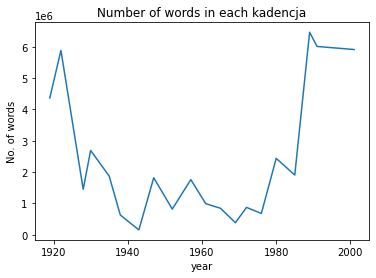

In [23]:
plt.plot(df.year_start, df.no_words)
plt.xlabel('year')
plt.ylabel('No. of words')
plt.title('Number of words in each kadencja')

plt.show()

The graph above presents the number of words (in millions) included in the transcriptions during the analysed period. Immidiately one can notice a U-shaped relation. The reason for siginificantly lower number of words in the period 1930s - 1990s is clearly rooted in Polish history. Simply during that time Sejm sessions were opened much more rarely because of political reasons (the Second World War and PRL era). The initial drop in mid-twenties however was caused by the May Coup (1926) and eventually the April Constitution (1935) which resulted i.a. in marginalising the role of the Parliament. Starting from 1990s the Sejm sessions are opened regularly and the number of words is more less stable.  

Before analysing the distances between the chosen word sets and adjectives of interest we decide to tranform the distances from absolute to relative ones. Numeric features with cosine similarities were min-max scaled. This means that scores will represent changes in the similarity more closely, with a trade-off of losing information about absolute similarity.

In [24]:
features = ['women_positive', 'women_negative', 'women_competence',
       'women_appearance', 'women_foreign', 'man_positive', 'man_negative',
       'man_competence', 'man_appearance', 'man_foreign', 'bothsexes_positive',
       'bothsexes_negative', 'bothsexes_competence', 'bothsexes_appearance',
       'bothsexes_foreign', 'jews_positive', 'jews_negative',
       'jews_competence', 'jews_appearance', 'jews_foreign',
       'imigrants_positive', 'imigrants_negative', 'imigrants_competence',
       'imigrants_appearance', 'imigrants_foreign', 'others_positive',
       'others_negative', 'others_competence', 'others_appearance',
       'others_foreign']

df_scaled = df[features]

df_scaled -= df_scaled.min()
df_scaled /= df_scaled.max()

In [25]:
df_counts_entities

,bothsexes,imigrants,jews,man,obywatel,others,women,year_start,years
0,765,37,1809,202,7927,5425,563,1919,1919-1922
1,825,59,2001,248,9063,10051,577,1922,1922-1927
2,207,9,459,54,1517,3337,153,1928,1928-1930
3,343,10,558,120,2698,5627,223,1930,1930-1935
4,319,12,614,84,1928,2908,235,1935,1935-1938
5,151,8,233,54,593,1368,97,1938,1938-1939
6,22,4,29,9,784,168,13,1943,1943-1947
7,909,21,45,123,3513,1191,786,1947,1947-1952
8,524,0,4,78,2059,440,446,1952,1952-1956
9,432,31,22,112,2757,649,320,1957,1957-1961


### Gender perception

The first part of the project is dedicated to differences in gender perceptions across the 1919-2005 period. We begin by chcecking the number of overall occurances of men- and women-related words. Next we focus of the distances between predefined positive and negative general adjectives. For example in positive we included: inteligent, rational, decisive or kind, and in negative words such as: deceitful, stubborn or hostile. We continued with assesing the relation between gender and competence-and appearance-related words. The aim was to check how often do the topic of intelectual and manual abilities is mentioned when speaking about women and men compared to the topic of their outer looks. The adjectives describing skills were i.a. skilled, clever or creative, and those reffering to the appearance: attractive, bald or well-built. 

The detailed adjectives' list is included in words_const.py .

### How often particular gender was mentioned?

Note: plots presented below are scaled by number of words in each year - to account for varying number of words per year.

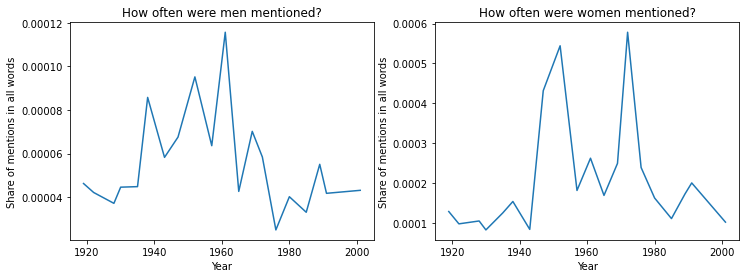

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(df_counts_entities.year_start, df_counts_entities.man/df.no_words)
plt.title('How often were men mentioned?')
plt.ylabel('Share of mentions in all words')
plt.xlabel('Year')

plt.subplot(1,2,2)

plt.plot(df_counts_entities.year_start, df_counts_entities.women/df.no_words)
plt.title('How often were women mentioned?')
plt.ylabel('Share of mentions in all words')
plt.xlabel('Year')
plt.show()

We can see that in the PRL era both women and men topics were much more popular than before the IIWW and nowadays. We find it worth emphasising that we excluded words such as "pan" or "pani" from the calculations so with high level of certainty we can state, that it was the gender that was discussed. 

Here we offer a brief explanation to our assumption: <br>
We anticipated that the results could be strongly influenced by the way people address each other in Polish language. For example when adressing the previous speaker it is common to start with "pani.." or "pan..". On the other hand such words clearly indicate that the topic of conversation if used in other context than the above mentioned. The same goes for English with expressions such as sir or madam, but we find them solely used to address the speaker and not to speak about women or men in general. For the sake of results accuracy we decided to omit "pan" and "pani" to avoid the bias.

What can be another reason of very few women mentions until 1940s is the fact that there were only few women members of the Parliament and probably female-related topics were seldom on the agenda. For example during the first cadence there were just 7 women speakers.

As a continuation of the idea that people approach each other by polite expressions, we decided to check the occurances of words like: "obywatel", "obywatelka", "towarzysz" etc. On the graph below we evidently see that the "referal bias" is persistent in Sejm transcriptions - the word "citizen" was most oftenly used when it was common to address other people as "citizens" and not as a description of actual citizens (group of people). Indeed, excluding "pan" and "pani" was a right decision.

Text(0.5, 1.0, 'How often was "obywatel" mentioned?')

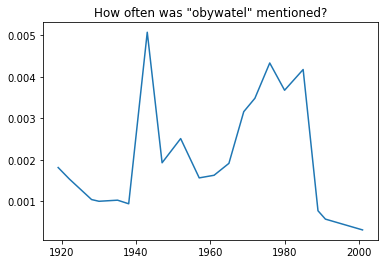

In [27]:
plt.plot(df_counts_entities.year_start, df_counts_entities.obywatel/df.no_words)
plt.title('How often was "obywatel" mentioned?')

### Positive mentions:

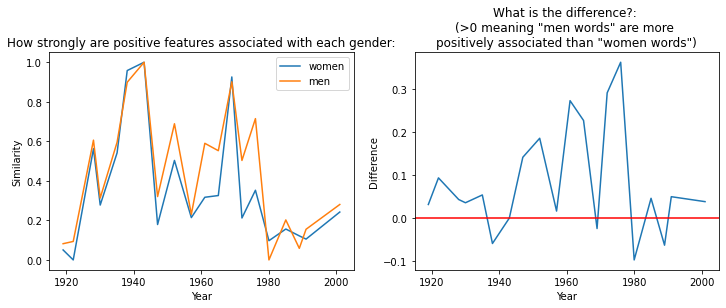

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(df.year_start, df_scaled.women_positive, label = 'women')
plt.plot(df.year_start, df_scaled.man_positive, label = 'men')

plt.title('How strongly are positive features associated with each gender:')
plt.ylabel('Similarity')
plt.xlabel('Year')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df.year_start, df_scaled.man_positive-df_scaled.women_positive)

plt.ylabel('Difference')
plt.title('What is the difference?: \n(>0 meaning "men words" are more \npositively associated than "women words")')
plt.axhline(0, color = 'r')
plt.xlabel('Year')
plt.show()

The graphs picture relative distances of positive adjectives to the women and men word sets. We do not observe a significant difference, however what can be more of our interest is the difference rather than the absolute values. On the right handside the differences are presented. We calculated them in the following way: men positives minus women positives, hence values above 0 suggest that positive adjectives are more likely to appear with men words. In the majority of years it was men who were more positively characterised, but we observe a non stable relation. 

### Negative mentions:

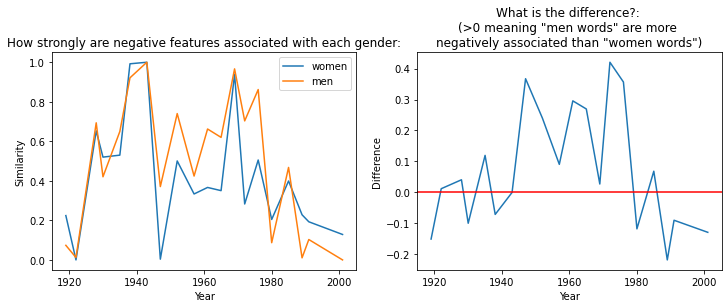

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(df.year_start, df_scaled.women_negative, label = 'women')
plt.plot(df.year_start, df_scaled.man_negative, label = 'men')

plt.title('How strongly are negative features associated with each gender:')
plt.ylabel('Similarity')
plt.xlabel('Year')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df.year_start, df_scaled.man_negative-df_scaled.women_negative)

plt.ylabel('Difference')
plt.title('What is the difference?: \n(>0 meaning "men words" are more \nnegatively associated than "women words")')
plt.axhline(0, color = 'r')
plt.xlabel('Year')
plt.show()

Next we repeated the procedure but for negative adjectives. In this case the differences are less obvious and it is difficult to draw a conclusion. However what seems interesting is the fact, that during the PRL era men were spoken more negatively about than women. On the contrary, since 1990 the negatives are more often attributed to women that men and we have not observed a change in this trend even once. Also, looking a the graph on the left handside we can notice, that the distances both form men and women are getting smaller in recent years. Hence our question: is the political debate getting more gentle and elegant in terms of speech?

### Appearance and competence:

#### Competence

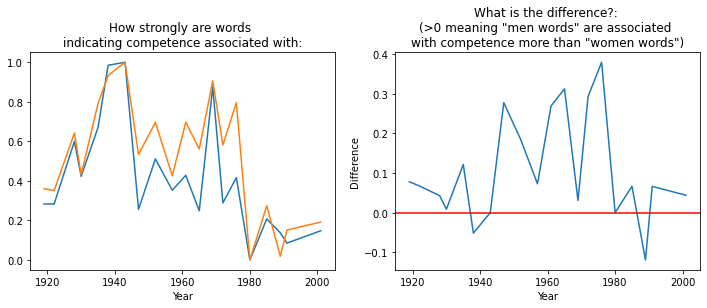

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(df.year_start, df_scaled.women_competence, label = 'women')
plt.plot(df.year_start, df_scaled.man_competence, label = 'men')
plt.xlabel('Year')
plt.title('How strongly are words \nindicating competence associated with:')


plt.subplot(1,2,2)
plt.plot(df.year_start, df_scaled.man_competence-df_scaled.women_competence)
plt.axhline(0, color = 'r')
plt.ylabel('Difference')
plt.xlabel('Year')
plt.title('What is the difference?: \n(>0 meaning "men words" are associated \nwith competence more than "women words")')

plt.show()

Speaking about competences it is self-evident that such adjectives are more likely attributed to men - the difference is greater than zero in almost all years.

#### Appearance

Not surprisingly, the competences are not all that matter. We repeated the procedure and utilised the list of adjectives attributed to the appearance.

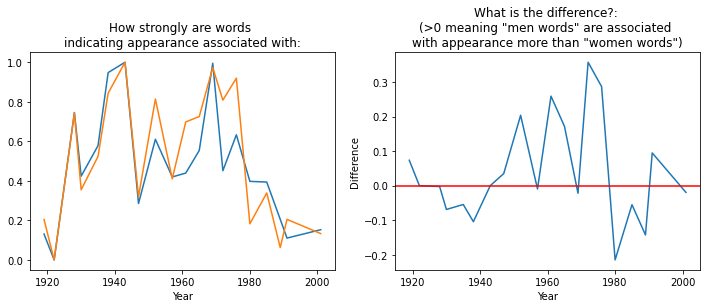

In [31]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(df.year_start, df_scaled.women_appearance, label = 'women')
plt.plot(df.year_start, df_scaled.man_appearance, label = 'men')
plt.xlabel('Year')
plt.title('How strongly are words \nindicating appearance associated with:')


plt.subplot(1,2,2)
plt.plot(df.year_start, df_scaled.man_appearance-df_scaled.women_appearance)
plt.axhline(0, color = 'r')
plt.ylabel('Difference')
plt.xlabel('Year')
plt.title('What is the difference?: \n(>0 meaning "men words" are associated \nwith appearance more than "women words")')

plt.show()

In the case of appearance the findings are not obvious. Both men and women are discussed in terms of their looks. Yet again we see that during PRL era it was mostly men whos traits were mentioned. We hypothesise it may be due to the promoted image of a working class representative.

Next it is valuable to check a joint measure of difference between competence and appearance description. To do that we defined a "competence bias index", as difference between appearance mentions and competence mentions. Positive value of this index means that particular gender is more likely to be pictured judging by appearance, and not by competence.

We calculate such difference for both men and women and later compare the bias between the two poles.

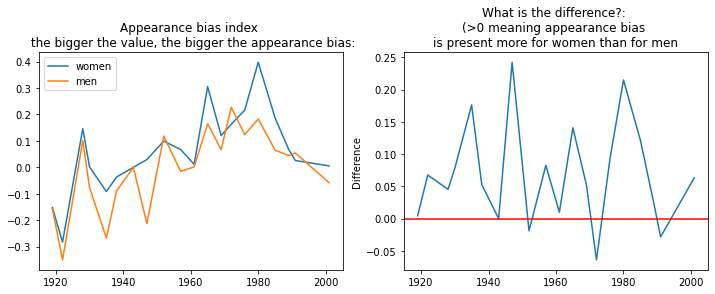

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
women_appearance_bias = df_scaled.women_appearance-df_scaled.women_competence
man_appearance_bias = df_scaled.man_appearance-df_scaled.man_competence
plt.plot(df.year_start, women_appearance_bias, label = 'women')
plt.plot(df.year_start, man_appearance_bias, label = 'men')

plt.title('Appearance bias index \n the bigger the value, the bigger the appearance bias:')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df.year_start, women_appearance_bias-man_appearance_bias)
plt.ylabel('Difference')    
plt.axhline(0, color = 'r')
plt.title('What is the difference?: \n(>0 meaning appearance bias \nis present more for women than for men')
plt.show()


From the first graph it can be concluded that starting form the 1960s the appearance with regard to the gender is much more popular topic than competences. The second graph displays a striking difference between men an women - the competence bias is much more evident when speaking about women, meaning that appearance is strongly associated with women than their competences. 

### Jews

The next group of our interest are Jews. We consider also this topics to frequently appear in public debate. Certainly not in every environment rather in far-right groups, but as native Polish speakers we noticed many stereotypes of judaism in everyday language. Hence we are interested to see if what is sometimes appears in the media with regard to politicians speaking about their "theories" is anyhow representative or is merely a press sensation. 

Text(0.5, 1.0, 'How often were Jews mentioned?')

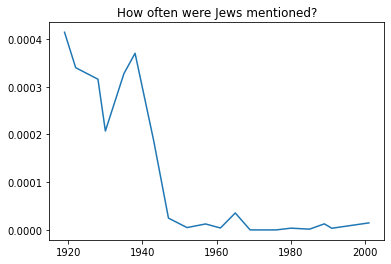

In [33]:
plt.plot(df_counts_entities.year_start, df_counts_entities.jews/df.no_words)
plt.title('How often were Jews mentioned?')

On the graph above it is clearly visible that the debate on Jews in Polish politics can be treated as history. Before the Second World War the Jews-related words naturally occured quite frequently as Jews constituded an important minority in the society. A small yet apparent rise in mid-1960 is most likely correlated with antisemitic movement encouraged by the government and USSR. 

### Foreigners

Another subject that we believe is worth examining is related to foreigners. 
We decided to limit our analysis to the closest neighbours - Russians, Germans, Ukrainians and we added a general group of Arabs.
Also those nations marked their role in Polish history and are likely to be found in public debate even today.
Yet it is interesting to see if the sentiment towards the foreing nations has changed over the years.


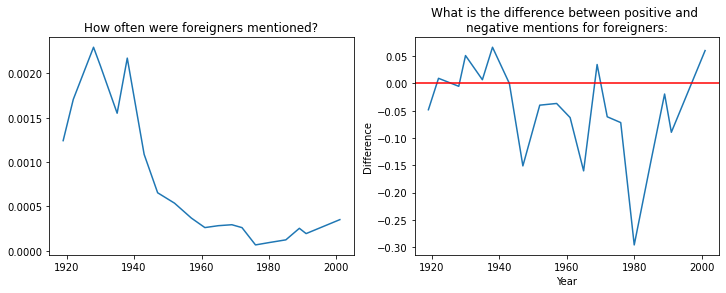

In [34]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(df_counts_entities.year_start, df_counts_entities.others/df.no_words)
plt.title('How often were foreigners mentioned?')

plt.subplot(1,2,2)
plt.plot(df.year_start, df_scaled.others_positive-df_scaled.others_negative)


plt.title('What is the difference between positive and \nnegative mentions for foreigners:')
plt.ylabel('Difference')
plt.xlabel('Year')
plt.axhline(0, color = 'r')
plt.show()


As we can see on the graph, the words related to foreigners were most frequent before the 1940s. It most probably stems from the fact, that before the II WW Poland was a very nationaly and ethnicaly diverse country. In the PRL era however such topics were almost not mentioned. 
This observation goes in line with the world-view promoted during that time, when foreigners were treated as threat and international
relations were limited. In the recent years we once again observe a rise in the occurances of words related to foreing nations. 
The reason for this trend may be the opening of Polish economy and society to international trade and connections as well as recent migrations. 

### Immigrants

The last group of our interest were immigrants. We were curious if it would be possible to notice 21st century immigration crisis and relate it to the sigificance of migrations caused by the war. However we did not find many occurances of words matching our specified imigrant key-words (see vertical axis). We decided not to draw any concluions minding that due to the small number of observations they could be inaccurate.

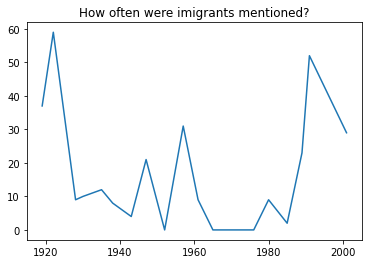

In [35]:
plt.plot(df_counts_entities.year_start, df_counts_entities.imigrants)
plt.title('How often were imigrants mentioned?')
plt.show()

**Conclusion**

Our analysis proved to be very much different from the one we were referring to. Nonetheless we were able to notice many interesting relations. Even though not clear at the first sight (we never observed a trend) the linkage between observed variables was almost always stemming from complex Polish history. Again, we had a chance to see that text analysis always has to be done in relation with the broader context rather than be based solely on the data. We observed a change in the frequency of negatively loaded adjectives, so it may be that the culture of public debate is changing. However, it can not be forgotten that the analysis was carried out on a  selected list of adjectives. We did not control for the change in language which undoubtedly had taken place within the 100 years span. To further advance our analysis it would be valuable to check other word sets, which could be trated as trigger subjects in Polish public debate, for exapmle communists, and adjust the list of adjectives basing on NJKP corpus frequencies.